In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Extracting imputed database

In [2]:
db = pd.read_csv('FeNiCo_comp-prop_imp.csv')
db = db.iloc[:,1:]
db

,Fe,Co,Ni,V,Mo,Cr,Cu,Mn,C,W,...,Si,Ms,Hc,Tc,ER,TS,YS,Elong,HV,Cost
0,100.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.23,39.40,724.00,8.56,NaN,NaN,40.00,104.96,0.42
1,99.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.24,72.22,739.00,11.90,NaN,NaN,40.00,104.25,0.77
2,98.00,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.25,97.21,753.00,14.13,NaN,NaN,40.00,103.76,1.11
3,97.00,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.26,119.77,767.00,15.94,NaN,NaN,40.00,103.52,1.45
4,96.00,4.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.27,147.59,780.00,17.64,NaN,NaN,40.00,103.50,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,49.25,49.25,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.24,966.00,964.41,29.86,NaN,NaN,7.35,265.30,21.77
1204,49.25,49.25,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.21,1066.00,964.41,29.86,NaN,NaN,7.35,265.30,21.77
1205,49.25,49.25,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.30,383.00,964.41,29.86,NaN,NaN,7.35,265.30,21.77
1206,49.25,49.25,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.28,351.00,964.41,29.86,NaN,NaN,7.35,265.30,21.77


In [3]:
db = pd.concat([db.iloc[:,:19],db.iloc[:,21:]], axis=1)
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fe      1208 non-null   float64
 1   Co      1208 non-null   float64
 2   Ni      1208 non-null   float64
 3   V       1208 non-null   float64
 4   Mo      1208 non-null   float64
 5   Cr      1208 non-null   float64
 6   Cu      1208 non-null   float64
 7   Mn      1208 non-null   float64
 8   C       1208 non-null   float64
 9   W       1208 non-null   float64
 10  Ta      1208 non-null   float64
 11  Nb      1208 non-null   float64
 12  Al      1208 non-null   float64
 13  Ti      1208 non-null   float64
 14  Si      1208 non-null   float64
 15  Ms      1208 non-null   float64
 16  Hc      1208 non-null   float64
 17  Tc      1208 non-null   float64
 18  ER      1208 non-null   float64
 19  Elong   1208 non-null   float64
 20  HV      1208 non-null   float64
 21  Cost    1208 non-null   float64
dtype

#### Extracting input columns and all the desired properties

In [4]:
X = db.iloc[:,:-7]
X.head()

,Fe,Co,Ni,V,Mo,Cr,Cu,Mn,C,W,Ta,Nb,Al,Ti,Si
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,99.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,98.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,97.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,96.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y = pd.concat([db.iloc[:,-7],np.log10(db.iloc[:,-6]),np.log10(db.iloc[:,-5]+273),np.log10(db.iloc[:,-4:])],axis=1)
y.rename(columns = {'Hc' : 'logHc', 'ER' : 'logER', 'Tc':'logTc', 'Elong':'logEl', 'HV':'logHV', 'Cost':'logCost'}, inplace = True)
y.head()

,Ms,logHc,logTc,logER,logEl,logHV,logCost
0,2.23,1.595496,2.998695,0.932474,1.60206,2.021024,-0.376751
1,2.24,1.858657,3.005181,1.075547,1.60206,2.018076,-0.113509
2,2.25,1.987711,3.011147,1.150142,1.60206,2.016030,0.045323
3,2.26,2.078348,3.017033,1.202488,1.60206,2.015024,0.161368
4,2.27,2.169057,3.022428,1.246499,1.60206,2.014940,0.252853


# Defining functions to calculate CV metric scores

In [6]:
from sklearn import metrics

# Function to return the mean of the metric for a particular metric name
def metrics_mean(y_ac, y_pred, metric):
    score = {'Ms':[],'logHc':[],'logTc':[],'logER':[], 'logElong':[],'logHV':[], 'logCost':[]}
    n = ['Ms','logHc','logTc','logER','logElong', 'logHV', 'logCost']
    if metric == 'rmse':
        for i in range(len(n)):
            score[n[i]].append(np.sqrt(metrics.mean_squared_error(y_ac[:,i], y_pred[:,i])))
    elif metric == 'mae':
        for i in range(len(n)):
            score[n[i]].append(metrics.mean_absolute_error(y_ac[:,i], y_pred[:,i]))
    elif metric == 'R2':
        for i in range(len(n)):
            score[n[i]].append(metrics.r2_score(y_ac[:,i], y_pred[:,i]))
    else:
        for i in range(len(n)):
            score[n[i]] = np.inf
    return score

# Final function "plot" to plot the train-train predicted values, test-test predicted values and the metrics for
# each ML algorithm used
def plot(regressor_name, y_train, y_train_pred, y_test, y_test_pred):
    
    y_train = scalerY.inverse_transform(y_train)
    y_pred_train = scalerY.inverse_transform(y_train_pred)
    y_test = scalerY.inverse_transform(y_test)
    y_pred_test = scalerY.inverse_transform(y_test_pred)

    n = ['Ms','logHc','logTc','logER','logElong', 'logHV', 'logCost']
    xtl = [r'$M_s$', r'$log_{10}H_c$', r'$log_{10}T_c$', r'$log_{10}\rho$', r'$log_{10}\delta$', r'$log_{10}H_V$', r'$log_{10}Cost$']
    f, axes = plt.subplots(len(n), 2, figsize=(12,35))
    
    # training set
    for i in range(len(n)):
        # plot "predicted values vs actual values and true predictions" graph for train set using first prediction
        axes[i,0].scatter(y_train[:,i],y_pred_train[:,i])
        axes[i,0].plot(y_train[:,i],y_train[:,i],'k--',lw=3)

        axes[i,0].set_xlabel('Experimental Value',fontsize=16,labelpad=10)
        axes[i,0].set_ylabel('Predicted Value',fontsize=16,labelpad=10)
        for label in (axes[i,0].get_xticklabels() + axes[i,0].get_xticklabels()):
            label.set_fontsize(12)

        # calculate the metrics
        rmse = metrics_mean(y_train,y_pred_train,'rmse')  
        mae = metrics_mean(y_train,y_pred_train,'mae')
        R2 = metrics_mean(y_train,y_pred_train,'R2')
        
        # regressor name with all metrics in the title
        axes[i,0].set_title('Train set'
        +'\nRMSE for '+xtl[i]+': '+str(round(rmse[n[i]][0],3))
        +'\nMAE for '+xtl[i]+': '+str(round(mae[n[i]][0],3))
        +'\nR2 for '+xtl[i]+': '+str(round(R2[n[i]][0],3)),fontsize=16, pad=10)
    
    # test set
    for i in range(len(n)):
        # plot "predicted values vs actual values and true predictions" graph for train set using first prediction
        axes[i,1].scatter(y_test[:,i],y_pred_test[:,i])
        axes[i,1].plot(y_test[:,i],y_test[:,i],'k--',lw=3)
        
        axes[i,1].set_xlabel('Experimental Value',fontsize=16,labelpad=10)
        axes[i,1].set_ylabel('Predicted Value',fontsize=16,labelpad=10)
        for label in (axes[i,1].get_xticklabels() + axes[i,1].get_xticklabels()):
            label.set_fontsize(12)
        
        # calculate the metrics
        rmse = metrics_mean(y_test,y_pred_test,'rmse')  
        mae = metrics_mean(y_test,y_pred_test,'mae')
        R2 = metrics_mean(y_test,y_pred_test,'R2')
        
        # regressor name with all metrics in the title
        axes[i,1].set_title('Test set'
        +'\nRMSE for '+xtl[i]+': '+str(round(rmse[n[i]][0],3))
        +'\nMAE for '+xtl[i]+': '+str(round(mae[n[i]][0],3))
        +'\nR2 for '+xtl[i]+': '+str(round(R2[n[i]][0],3)),fontsize=16, pad=10)
    
    plt.tight_layout()
    plt.show()

    # return metrics for test set to record the errors across different algorithms
    return rmse, mae, R2

Empty metrics dictionaries to store the metrics for every ML algorithm

In [7]:
rmse_scores = {}
mae_scores = {}
R2_scores = {}

# Building Extra Trees model with just composition data

In [8]:
scalerX = StandardScaler()
X_transform = scalerX.fit_transform(X)
scalerY = StandardScaler()
y_transform = scalerY.fit_transform(y)

In [9]:
features = X.columns.values
features

array(['Fe', 'Co', 'Ni', 'V', 'Mo', 'Cr', 'Cu', 'Mn', 'C', 'W', 'Ta',
       'Nb', 'Al', 'Ti', 'Si'], dtype=object)

In [10]:
response = y.columns.values
response

array(['Ms', 'logHc', 'logTc', 'logER', 'logEl', 'logHV', 'logCost'],
      dtype=object)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_transform, test_size=0.2, random_state=0)

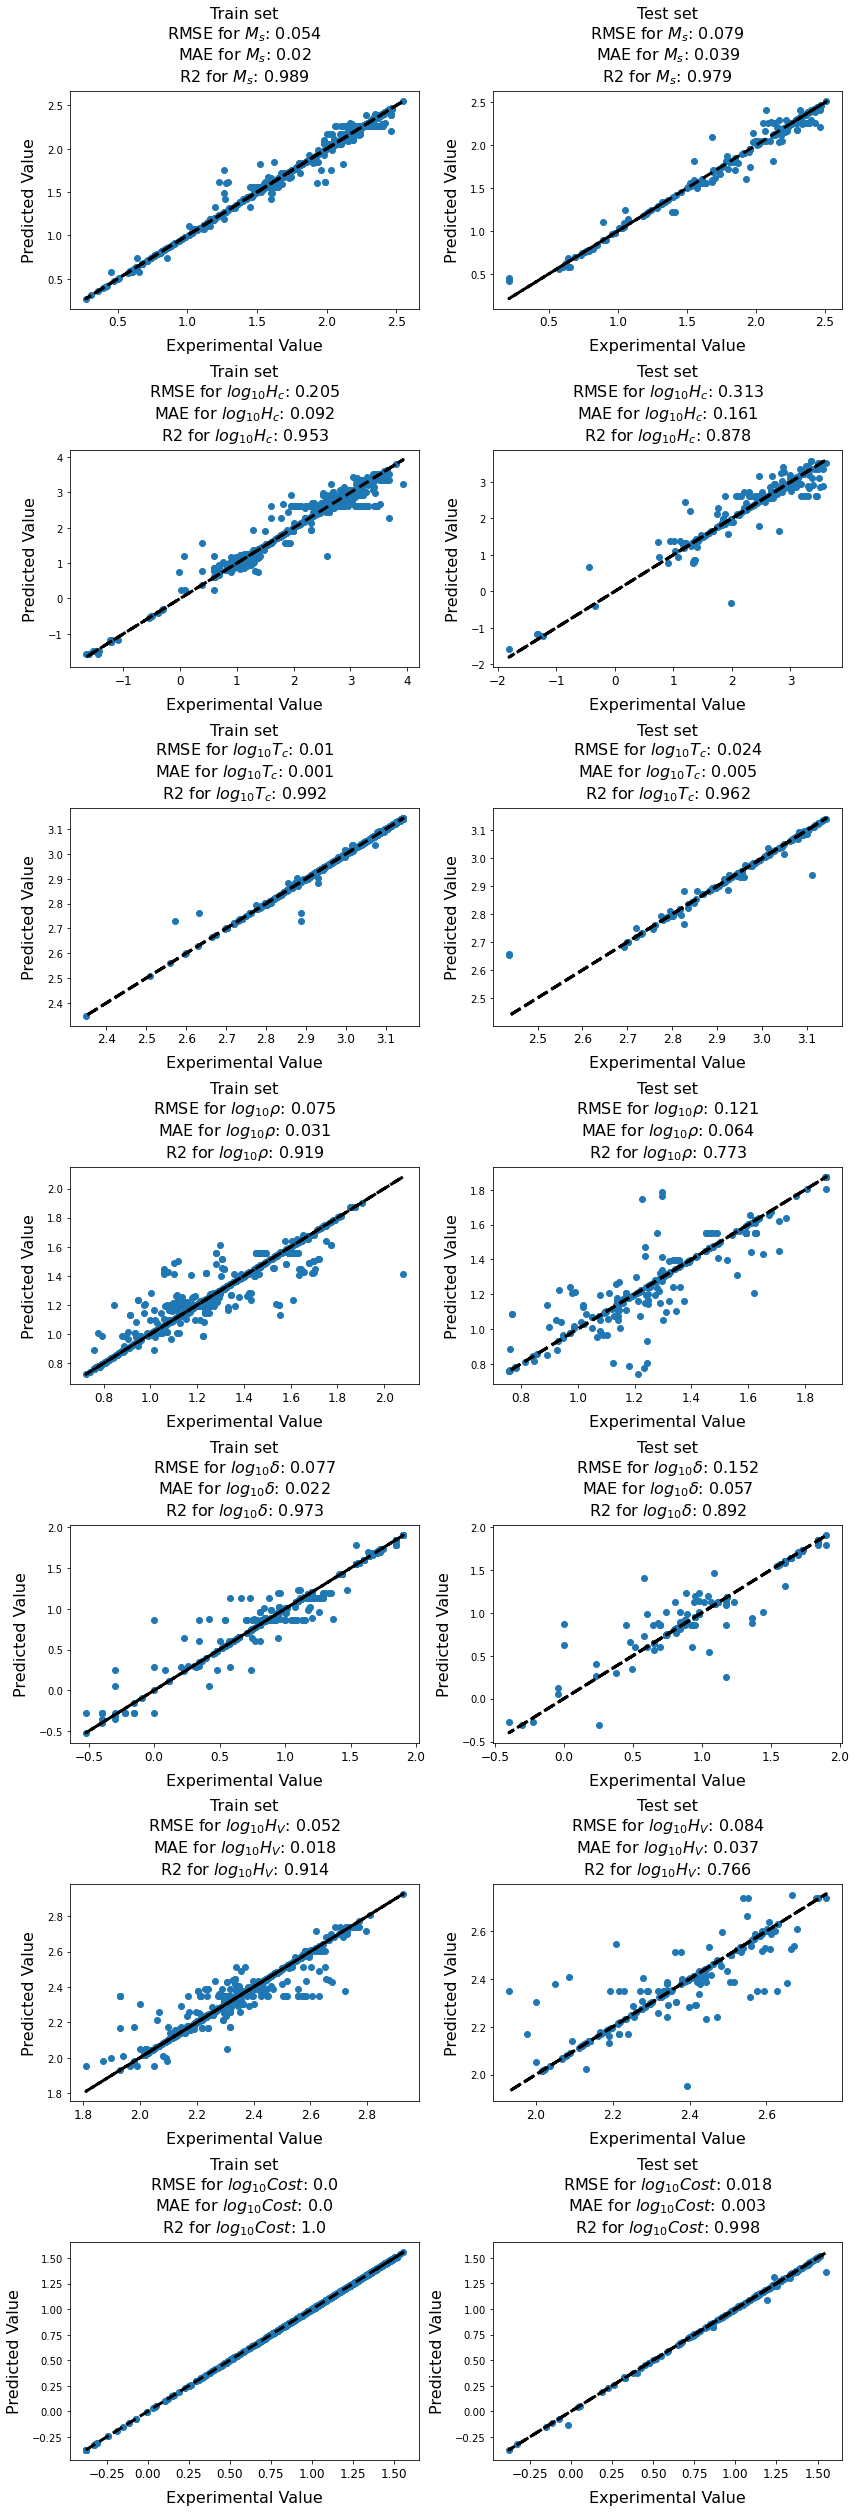

In [12]:
# Extra Trees Regression
from sklearn.ensemble import ExtraTreesRegressor

etregressor = ExtraTreesRegressor(n_estimators=230, max_depth=81, min_samples_split=2, min_samples_leaf=1,
                                  random_state=0)

etregressor.fit(X_train,y_train)
y_pred_train = etregressor.predict(X_train)
y_pred_test = etregressor.predict(X_test)

rmse, mae, R2 = plot('Extra Trees', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Extra Trees'] = rmse
mae_scores['Extra Trees'] = mae
R2_scores['Extra Trees'] = R2

# Experimental Validation of Extra Trees model

In [13]:
# Loading experimental compositions
spscomp = pd.read_excel('SPS FeCoNi Exp comp.xlsx')
spscomp

,Fe,Co,Ni,V,Mo,Cr,Cu,Mn,C,W,Ta,Nb,Al,Ti,Si
0,10.47,39.70,49.83,0,0,0,0,0,0,0,0,0,0,0,0
1,10.47,29.76,59.77,0,0,0,0,0,0,0,0,0,0,0,0
2,10.47,19.83,69.70,0,0,0,0,0,0,0,0,0,0,0,0
3,10.46,9.91,79.63,0,0,0,0,0,0,0,0,0,0,0,0
4,20.82,9.86,69.32,0,0,0,0,0,0,0,0,0,0,0,0
5,31.07,9.81,59.12,0,0,0,0,0,0,0,0,0,0,0,0
6,41.22,9.76,49.02,0,0,0,0,0,0,0,0,0,0,0,0
7,34.49,32.69,32.82,0,0,0,0,0,0,0,0,0,0,0,0
8,41.28,48.90,9.82,0,0,0,0,0,0,0,0,0,0,0,0
9,31.13,59.00,9.87,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# Predicting property values of experimental compositions using Extra Trees regressor
transformed = scalerX.transform(spscomp)
y_pred = etregressor.predict(transformed)
predicted = scalerY.inverse_transform(y_pred)
etpredprop = pd.DataFrame(predicted, columns=response)
etpredprop

,Ms,logHc,logTc,logER,logEl,logHV,logCost
0,1.297406,2.771408,3.042095,1.041605,1.168341,2.168385,1.306951
1,1.212022,2.567130,3.010128,1.055754,1.234477,2.205243,1.264773
2,1.102587,2.352793,2.961680,1.055400,1.411686,2.209877,1.205335
3,0.967478,1.719318,2.898799,1.134115,1.450188,2.293864,1.146113
4,1.178581,1.605308,2.869914,1.163798,1.462030,2.346627,1.106932
5,1.403768,1.102812,2.926218,1.226934,0.972389,2.269038,1.047571
6,1.594809,1.089253,2.929683,1.371992,0.893118,2.324764,1.000813
7,1.910196,2.579764,2.991418,1.260722,0.854018,2.519059,1.193753
8,2.153640,3.493519,3.066764,1.069388,1.222080,2.571604,1.254254
9,2.203808,3.485406,3.092225,1.122139,0.915955,2.466362,1.325299


In [15]:
# Creating dataframe of composition and predicted properties
etpred = pd.concat([spscomp,etpredprop],axis=1)
etpred

,Fe,Co,Ni,V,Mo,Cr,Cu,Mn,C,W,...,Al,Ti,Si,Ms,logHc,logTc,logER,logEl,logHV,logCost
0,10.47,39.70,49.83,0,0,0,0,0,0,0,...,0,0,0,1.297406,2.771408,3.042095,1.041605,1.168341,2.168385,1.306951
1,10.47,29.76,59.77,0,0,0,0,0,0,0,...,0,0,0,1.212022,2.567130,3.010128,1.055754,1.234477,2.205243,1.264773
2,10.47,19.83,69.70,0,0,0,0,0,0,0,...,0,0,0,1.102587,2.352793,2.961680,1.055400,1.411686,2.209877,1.205335
3,10.46,9.91,79.63,0,0,0,0,0,0,0,...,0,0,0,0.967478,1.719318,2.898799,1.134115,1.450188,2.293864,1.146113
4,20.82,9.86,69.32,0,0,0,0,0,0,0,...,0,0,0,1.178581,1.605308,2.869914,1.163798,1.462030,2.346627,1.106932
5,31.07,9.81,59.12,0,0,0,0,0,0,0,...,0,0,0,1.403768,1.102812,2.926218,1.226934,0.972389,2.269038,1.047571
6,41.22,9.76,49.02,0,0,0,0,0,0,0,...,0,0,0,1.594809,1.089253,2.929683,1.371992,0.893118,2.324764,1.000813
7,34.49,32.69,32.82,0,0,0,0,0,0,0,...,0,0,0,1.910196,2.579764,2.991418,1.260722,0.854018,2.519059,1.193753
8,41.28,48.90,9.82,0,0,0,0,0,0,0,...,0,0,0,2.153640,3.493519,3.066764,1.069388,1.222080,2.571604,1.254254
9,31.13,59.00,9.87,0,0,0,0,0,0,0,...,0,0,0,2.203808,3.485406,3.092225,1.122139,0.915955,2.466362,1.325299


In [16]:
# Saving the dataframe
etpred.to_excel('Mutli-property_ET_SPS Data_pred.xlsx')

In [37]:
# Loading the experimental properties data
exp_data = pd.read_excel("BM SPS Exp Val Data.xlsx")
exp_data

,Fe,Co,Ni,Ms,logHc,logTc,logER,logHV,logCost
0,10.47,39.70,49.83,1.37,3.144,3.032,1.422,2.134,1.303
1,10.47,29.76,59.77,1.18,2.980,3.005,1.310,2.187,1.261
2,10.47,19.83,69.70,1.08,2.961,2.971,1.292,2.193,1.213
3,10.46,9.91,79.63,0.95,2.874,2.948,1.281,2.198,1.160
4,20.82,9.86,69.32,1.31,2.591,2.954,1.352,2.250,1.117
5,31.07,9.81,59.12,1.29,2.679,2.945,1.423,2.270,1.070
6,41.22,9.76,49.02,1.41,2.223,2.951,1.589,2.318,1.017
7,34.49,32.69,32.82,1.60,2.793,3.009,1.423,2.345,1.196
8,41.28,48.90,9.82,1.97,3.062,3.063,1.246,2.432,1.254
9,31.13,59.00,9.87,1.91,2.758,3.066,1.193,2.424,1.326


In [38]:
# Calculating MAE for each property for ETR model property predictions on 40 experimental compositions
etr_mae = []
for var in exp_data.iloc[:,3:]:
    etr_mae.append(metrics.mean_absolute_error(exp_data[var],etpredprop[var]))

etr_mae                

[0.18290620559285573,
 0.5144721195218647,
 0.025888361857136832,
 0.1467076069062921,
 0.11878748607985998,
 0.013302877841874883]

# Building Neural Network model with 4 hidden layers with composition and Wen alloy features data

In [19]:
# Adding WenAlloys features
from pymatgen.core import Composition
from matminer.featurizers.composition.alloy import WenAlloys

elem = db.columns[:15].tolist()
form_list = []
for i in range(db.shape[0]):
    formula = ''
    for j in elem:
        if not db[j][i]==0:
            formula+=j
            formula+=str(db[j][i])
    form_list.append(formula)

db['pretty_formula']=form_list

# function to get the Wen alloys features for every composition
def get_alloy_features(form_list):
    wen_alloys = WenAlloys()
    feat_list = []
    for i in form_list:
        wen_alloys = WenAlloys()
        comp = Composition(i)
        all_features = wen_alloys.featurize(comp)
        feat_list.append(np.array(all_features[2:]))
    return np.stack(feat_list,axis=0)

a = get_alloy_features(form_list)

In [20]:
a.shape

(1208, 23)

In [21]:
X = np.array(db.iloc[:,:-8])
X.shape

(1208, 15)

In [22]:
X_all = np.concatenate([X,a],axis=1)
X_all.shape

(1208, 38)

In [23]:
scalerX = StandardScaler()
X_transform = scalerX.fit_transform(X_all)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_transform, test_size=0.2, random_state=0)

In [25]:
#Loading pre-trained model
from tensorflow import keras

nn4_wen = keras.models.load_model("C:/Users/shakt/Desktop/FeCoNi-db_MPR_NN-4lay")
nn4_wen.summary()

Model: "property_prediction_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 38)]              0         
                                                                 
 dense (Dense)               (None, 256)               9984      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 7)                 231       
                                                                 
Total params: 53,447
Trainable params: 53

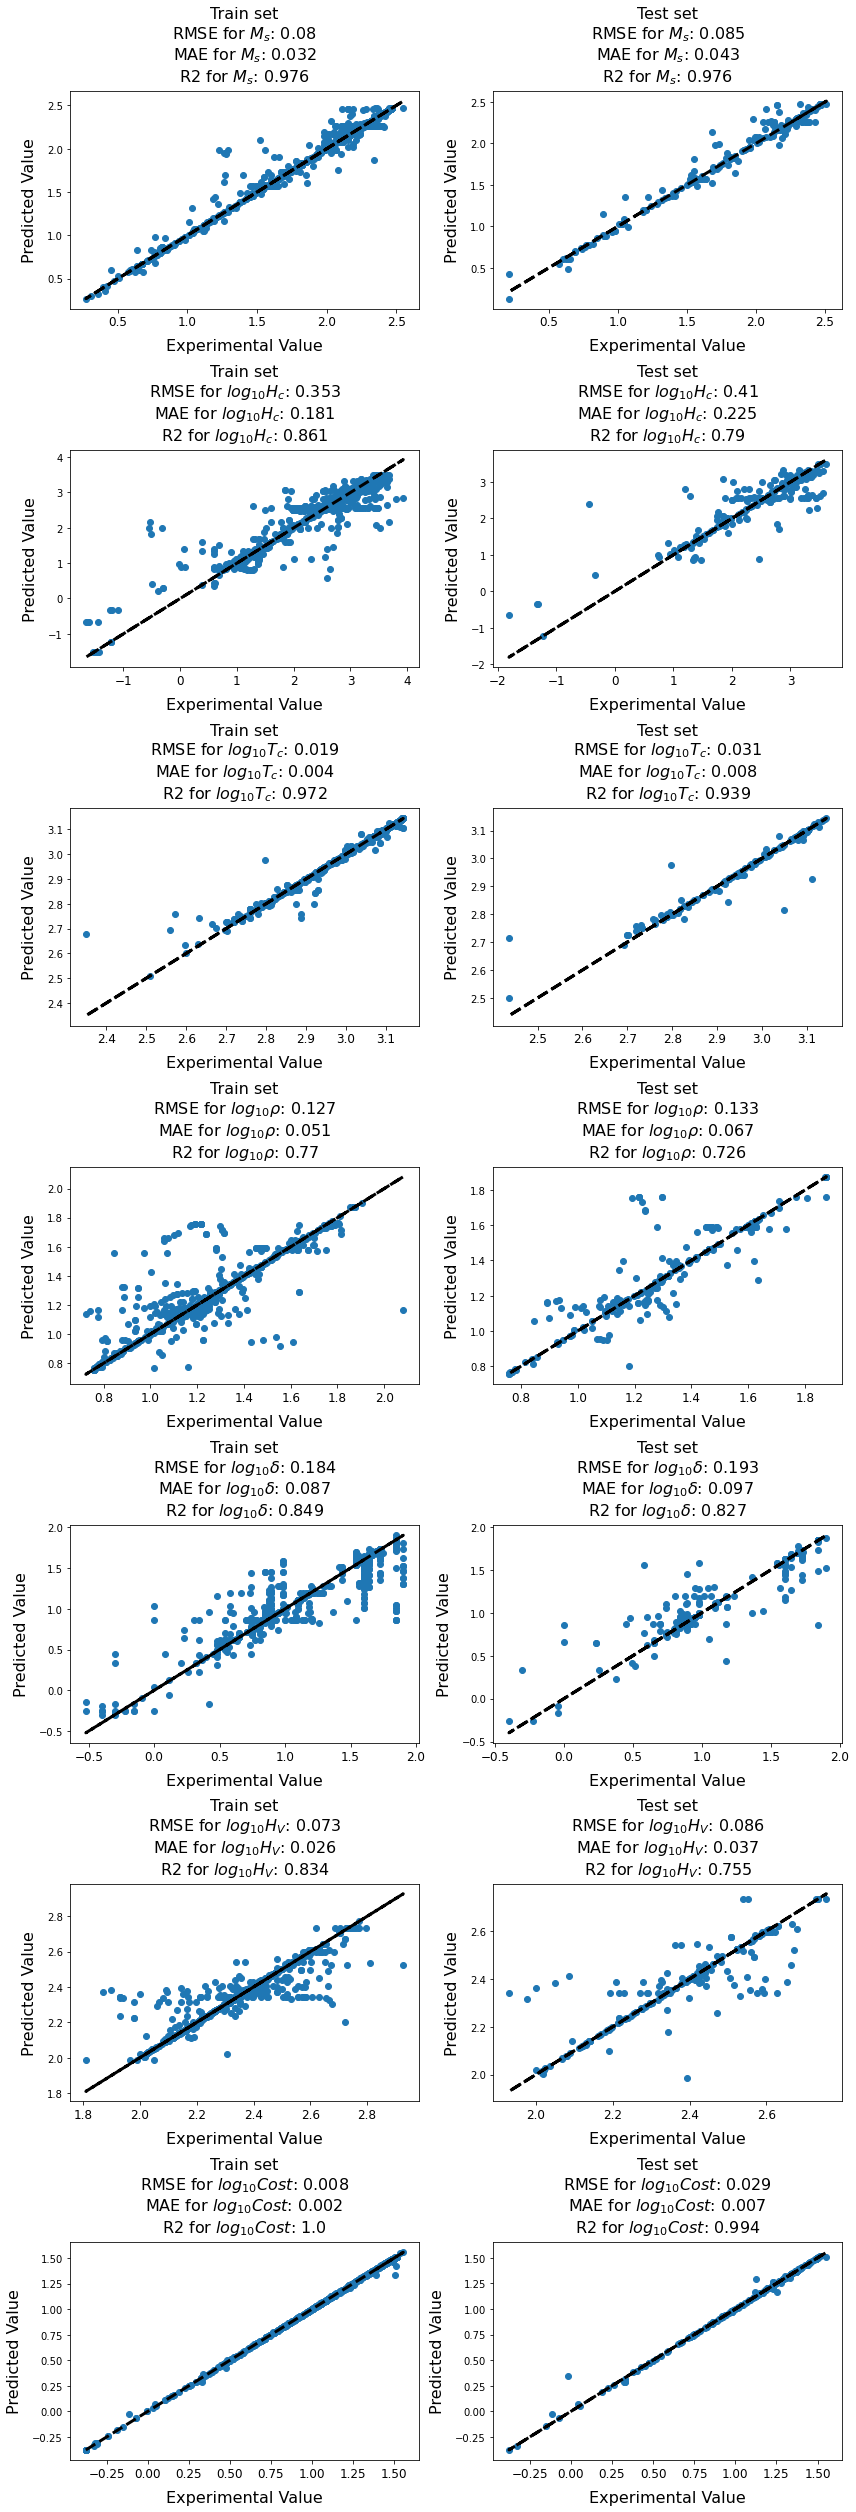

In [26]:
# Use the trained Keras model to predict on the training and test sets
y_pred_train=nn4_wen.predict(X_train)
y_pred_test=nn4_wen.predict(X_test)

# Plot the training results
rmse, mae, R2 = plot('NN 4 layers Wen', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['NN 4 layers Wen'] = rmse
mae_scores['NN 4 layers Wen'] = mae
R2_scores['NN 4 layers Wen'] = R2

# Experimental Validation of Neural Network model

In [27]:
form_list = []
for i in range(spscomp.shape[0]):
    formula = ''
    for j in elem:
        if not spscomp[j][i]==0:
            formula+=j
            formula+=str(spscomp[j][i])
    form_list.append(formula)

form_list

['Fe10.47Co39.7Ni49.83',
 'Fe10.47Co29.76Ni59.77',
 'Fe10.47Co19.83Ni69.7',
 'Fe10.46Co9.91Ni79.63',
 'Fe20.82Co9.86Ni69.32',
 'Fe31.07Co9.81Ni59.12',
 'Fe41.22Co9.76Ni49.02',
 'Fe34.49Co32.69Ni32.82',
 'Fe41.28Co48.9Ni9.82',
 'Fe31.13Co59.0Ni9.87',
 'Fe20.87Co69.2Ni9.93',
 'Fe10.49Co79.53Ni9.98',
 'Fe10.49Co69.55Ni19.96',
 'Fe10.48Co59.6Ni29.92',
 'Fe10.48Co49.64Ni39.88',
 'Fe51.32Co38.91Ni9.77',
 'Fe61.26Co29.03Ni9.71',
 'Fe71.09Co19.25Ni9.66',
 'Fe80.82Co9.57Ni9.61',
 'Fe71.06Co9.62Ni19.32',
 'Fe61.21Co9.67Ni29.12',
 'Fe51.26Co9.72Ni39.02',
 'Fe71.08Co14.43Ni14.49',
 'Fe61.24Co19.34Ni19.42',
 'Fe51.3Co24.3Ni24.4',
 'Fe41.25Co29.32Ni29.43',
 'Fe31.1Co34.38Ni34.52',
 'Fe20.84Co39.5Ni39.66',
 'Fe41.27Co39.1Ni19.63',
 'Fe36.19Co34.29Ni29.52',
 'Fe31.1Co29.46Ni39.44',
 'Fe25.97Co24.61Ni49.42',
 'Fe20.82Co19.73Ni59.45',
 'Fe15.65Co14.83Ni69.52',
 'Fe41.23Co19.54Ni39.23',
 'Fe36.18Co29.39Ni34.43',
 'Fe31.1Co39.3Ni29.6',
 'Fe25.99Co49.27Ni24.74',
 'Fe20.86Co59.29Ni19.85',
 'Fe15.69Co69.38Ni

In [28]:
a = get_alloy_features(form_list)
a.shape

(40, 23)

In [29]:
spscomp_arr = np.array(spscomp)
spscomp_wen = np.concatenate([spscomp_arr,a],axis=1)
spscomp_wen.shape

(40, 38)

In [30]:
# Predicting property values of experimental compositions using Extra Trees regressor
transformed = scalerX.transform(spscomp_wen)
y_pred = nn4_wen.predict(transformed)
predicted = scalerY.inverse_transform(y_pred)
nn4wenpredprop = pd.DataFrame(predicted, columns=response)
nn4wenpredprop

,Ms,logHc,logTc,logER,logEl,logHV,logCost
0,1.275810,2.656129,3.045093,1.255707,1.627463,2.377403,1.286032
1,1.167871,2.426067,3.018399,1.213163,1.640009,2.358932,1.240325
2,1.053595,2.169667,2.983818,1.187579,1.699566,2.336697,1.194891
3,0.923259,1.825939,2.940300,1.174458,1.754576,2.317520,1.159188
4,1.148408,1.739949,2.957043,1.185990,1.494649,2.311007,1.125471
5,1.414721,1.465686,2.940872,1.248232,0.955660,2.315406,1.060226
6,1.650299,1.459260,2.922497,1.346237,0.664494,2.362772,1.016912
7,1.800737,2.520585,2.992389,1.226066,0.897017,2.502775,1.185645
8,2.142393,3.284664,3.048922,1.034657,1.171801,2.580487,1.242038
9,2.101283,3.237112,3.066431,1.076736,1.346861,2.477159,1.337016


In [31]:
# Creating dataframe of composition and predicted properties
nn4wenpred = pd.concat([spscomp,nn4wenpredprop],axis=1)
nn4wenpred

,Fe,Co,Ni,V,Mo,Cr,Cu,Mn,C,W,...,Al,Ti,Si,Ms,logHc,logTc,logER,logEl,logHV,logCost
0,10.47,39.70,49.83,0,0,0,0,0,0,0,...,0,0,0,1.275810,2.656129,3.045093,1.255707,1.627463,2.377403,1.286032
1,10.47,29.76,59.77,0,0,0,0,0,0,0,...,0,0,0,1.167871,2.426067,3.018399,1.213163,1.640009,2.358932,1.240325
2,10.47,19.83,69.70,0,0,0,0,0,0,0,...,0,0,0,1.053595,2.169667,2.983818,1.187579,1.699566,2.336697,1.194891
3,10.46,9.91,79.63,0,0,0,0,0,0,0,...,0,0,0,0.923259,1.825939,2.940300,1.174458,1.754576,2.317520,1.159188
4,20.82,9.86,69.32,0,0,0,0,0,0,0,...,0,0,0,1.148408,1.739949,2.957043,1.185990,1.494649,2.311007,1.125471
5,31.07,9.81,59.12,0,0,0,0,0,0,0,...,0,0,0,1.414721,1.465686,2.940872,1.248232,0.955660,2.315406,1.060226
6,41.22,9.76,49.02,0,0,0,0,0,0,0,...,0,0,0,1.650299,1.459260,2.922497,1.346237,0.664494,2.362772,1.016912
7,34.49,32.69,32.82,0,0,0,0,0,0,0,...,0,0,0,1.800737,2.520585,2.992389,1.226066,0.897017,2.502775,1.185645
8,41.28,48.90,9.82,0,0,0,0,0,0,0,...,0,0,0,2.142393,3.284664,3.048922,1.034657,1.171801,2.580487,1.242038
9,31.13,59.00,9.87,0,0,0,0,0,0,0,...,0,0,0,2.101283,3.237112,3.066431,1.076736,1.346861,2.477159,1.337016


In [32]:
# Saving the dataframe
nn4wenpred.to_excel('Mutli-property_NNR-4lay-Wen_SPS Data_pred.xlsx')

In [39]:
# Calculating MAE for each property for ETR model property predictions on 40 experimental compositions
nn4wen_mae = []
for var in exp_data.iloc[:,3:]:
    nn4wen_mae.append(metrics.mean_absolute_error(exp_data[var],nn4wenpredprop[var]))

nn4wen_mae                

[0.15373982304334644,
 0.4263864717960358,
 0.01950783205032348,
 0.138627969956398,
 0.14245439128875734,
 0.011133809435367584]

# Plotting Predicted vs Experimental values for both models

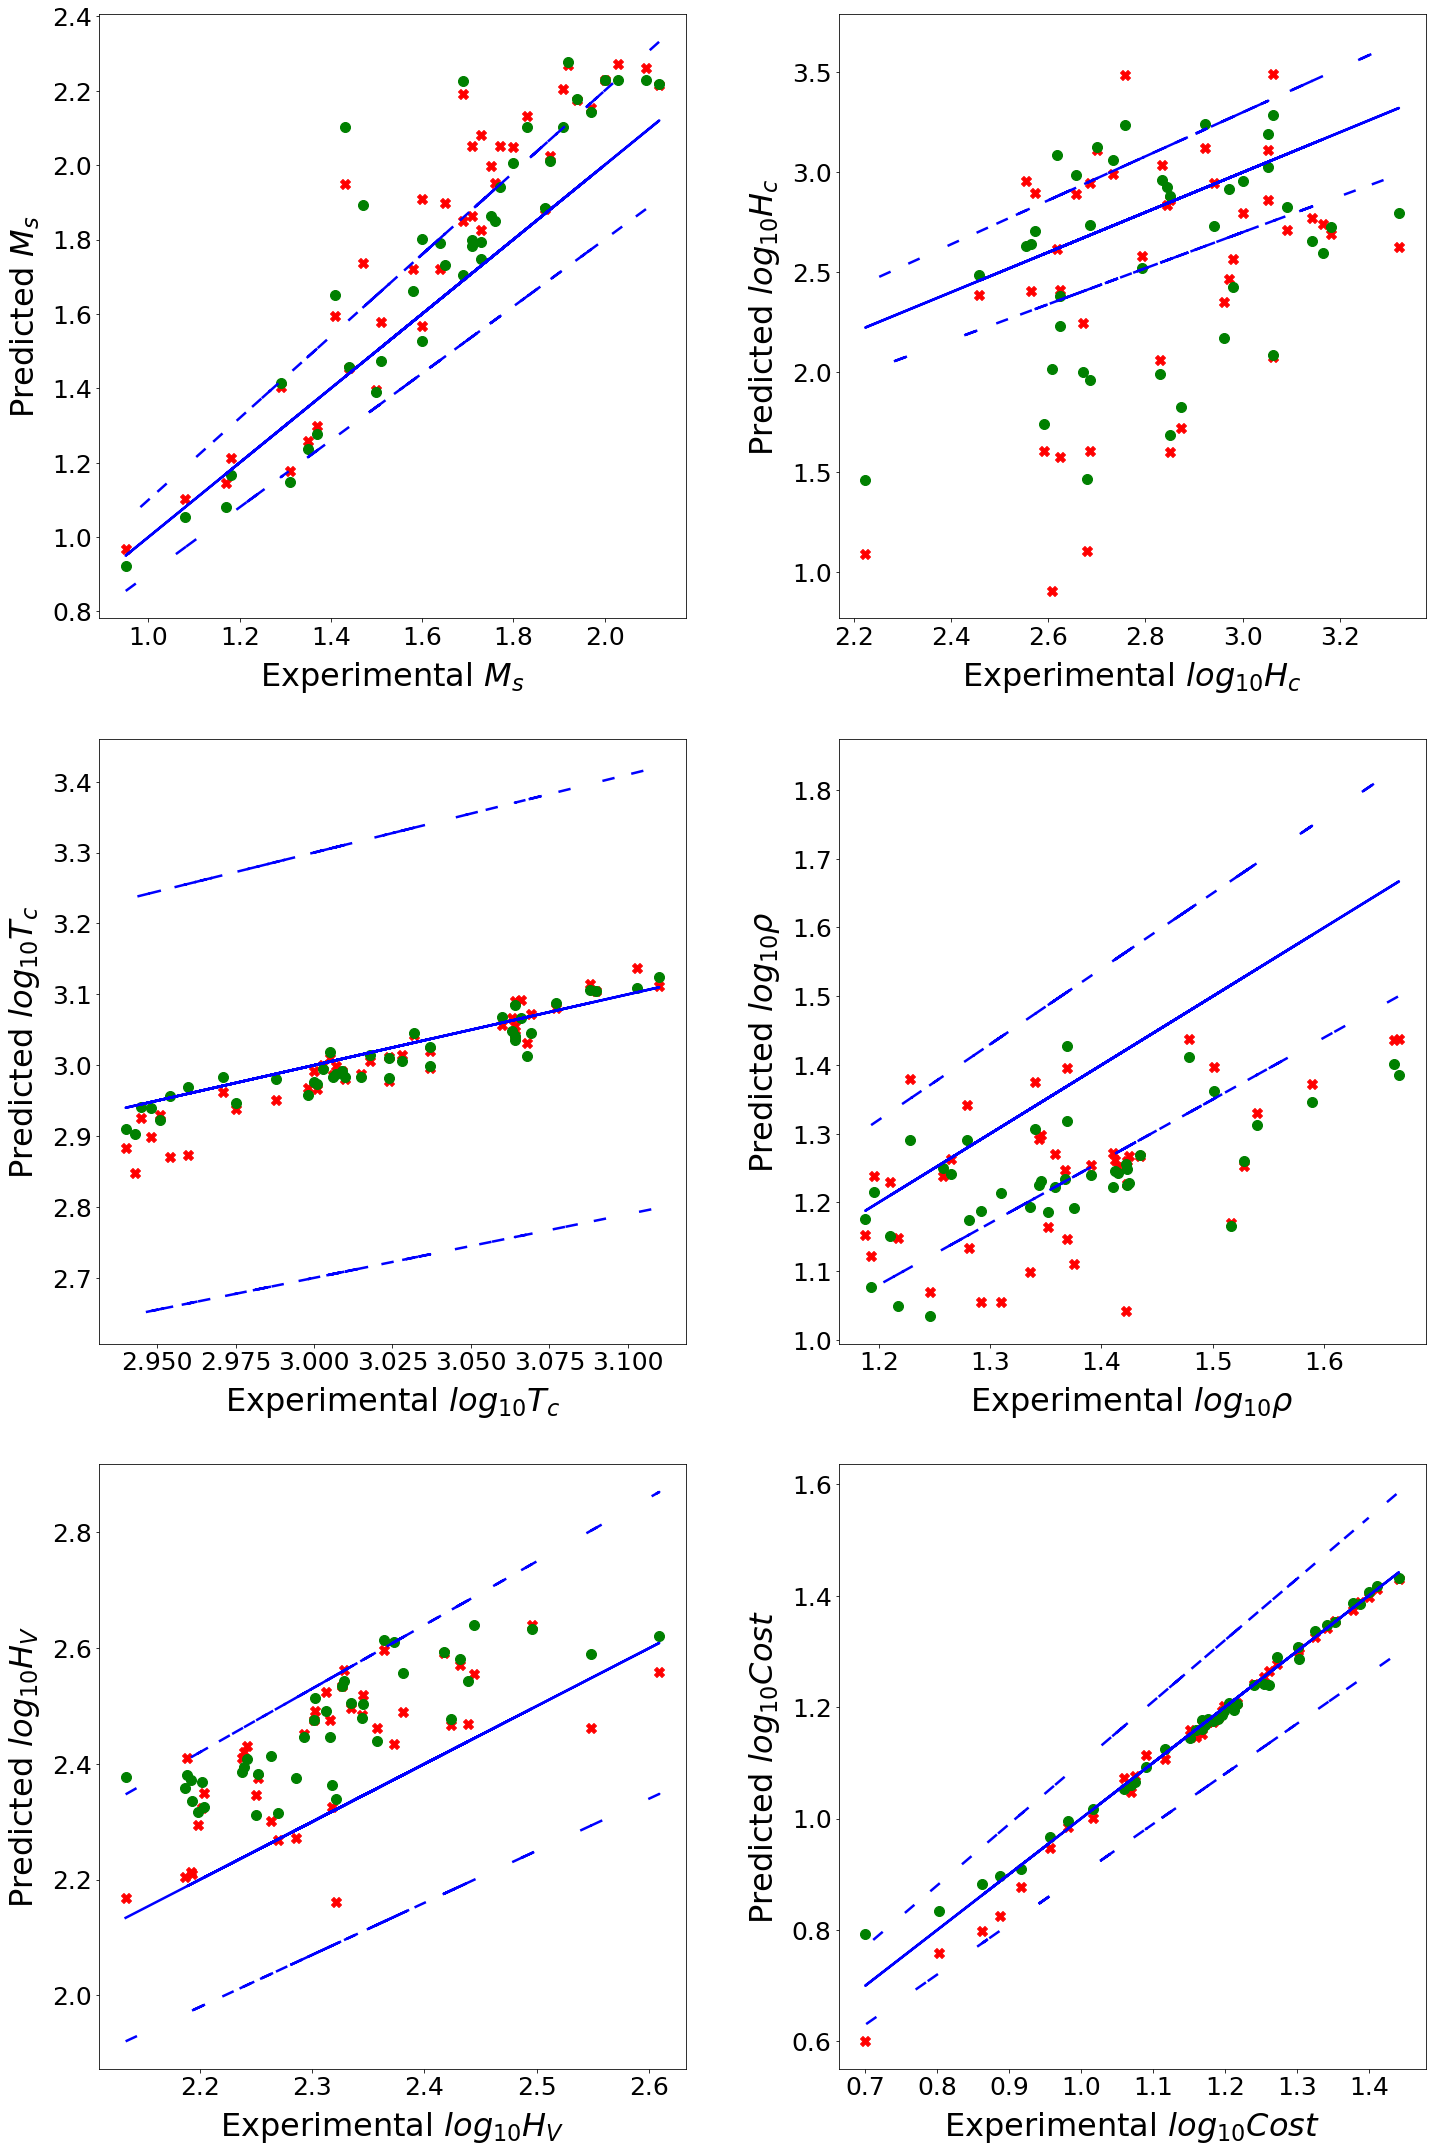

In [40]:
comparision, ax = plt.subplots(3,2, figsize=(20, 30))
title = [r'$M_s$', r'$log_{10}H_c$', r'$log_{10}T_c$', r'$log_{10}\rho$', r'$log_{10}H_V$', r'$log_{10}Cost$']
countX = 0
countY = 0

for i in range(6):
    x = exp_data.iloc[:,3+i].to_numpy()
    if i < 4:
        y1 = etpredprop.iloc[:,i].to_numpy()
        y2 = nn4wenpredprop.iloc[:,i].to_numpy()
    else:
        y1 = etpredprop.iloc[:,i+1].to_numpy()
        y2 = nn4wenpredprop.iloc[:,i+1].to_numpy()
    x1 = x - 0.1*x
    x2 = x + 0.1*x
    ax[countX,countY].set_xlabel('Experimental '+title[i],fontsize=32, labelpad=10)
    ax[countX,countY].set_ylabel('Predicted '+title[i],fontsize=32, labelpad=10)
    ax[countX,countY].plot(x,x,linestyle='-',color='b',linewidth=2.5)
    ax[countX,countY].plot(x,x1,linestyle='--',dashes=(5,25),color='b',linewidth=2.5)
    ax[countX,countY].plot(x,x2,linestyle='--',dashes=(5,25),color='b',linewidth=2.5)
    ax[countX,countY].scatter(x,y1,s=100,color='r',marker='X')
    ax[countX,countY].scatter(x,y2,s=100,color='g',marker='o')
    for label in (ax[countX,countY].get_xticklabels() + ax[countX,countY].get_yticklabels()):
        label.set_fontsize(25)
    countY +=1
    if countY == 2:
        countY = 0
        countX += 1

plt.tight_layout()
plt.subplots_adjust(wspace=0.26,hspace=0.20)
plt.show()

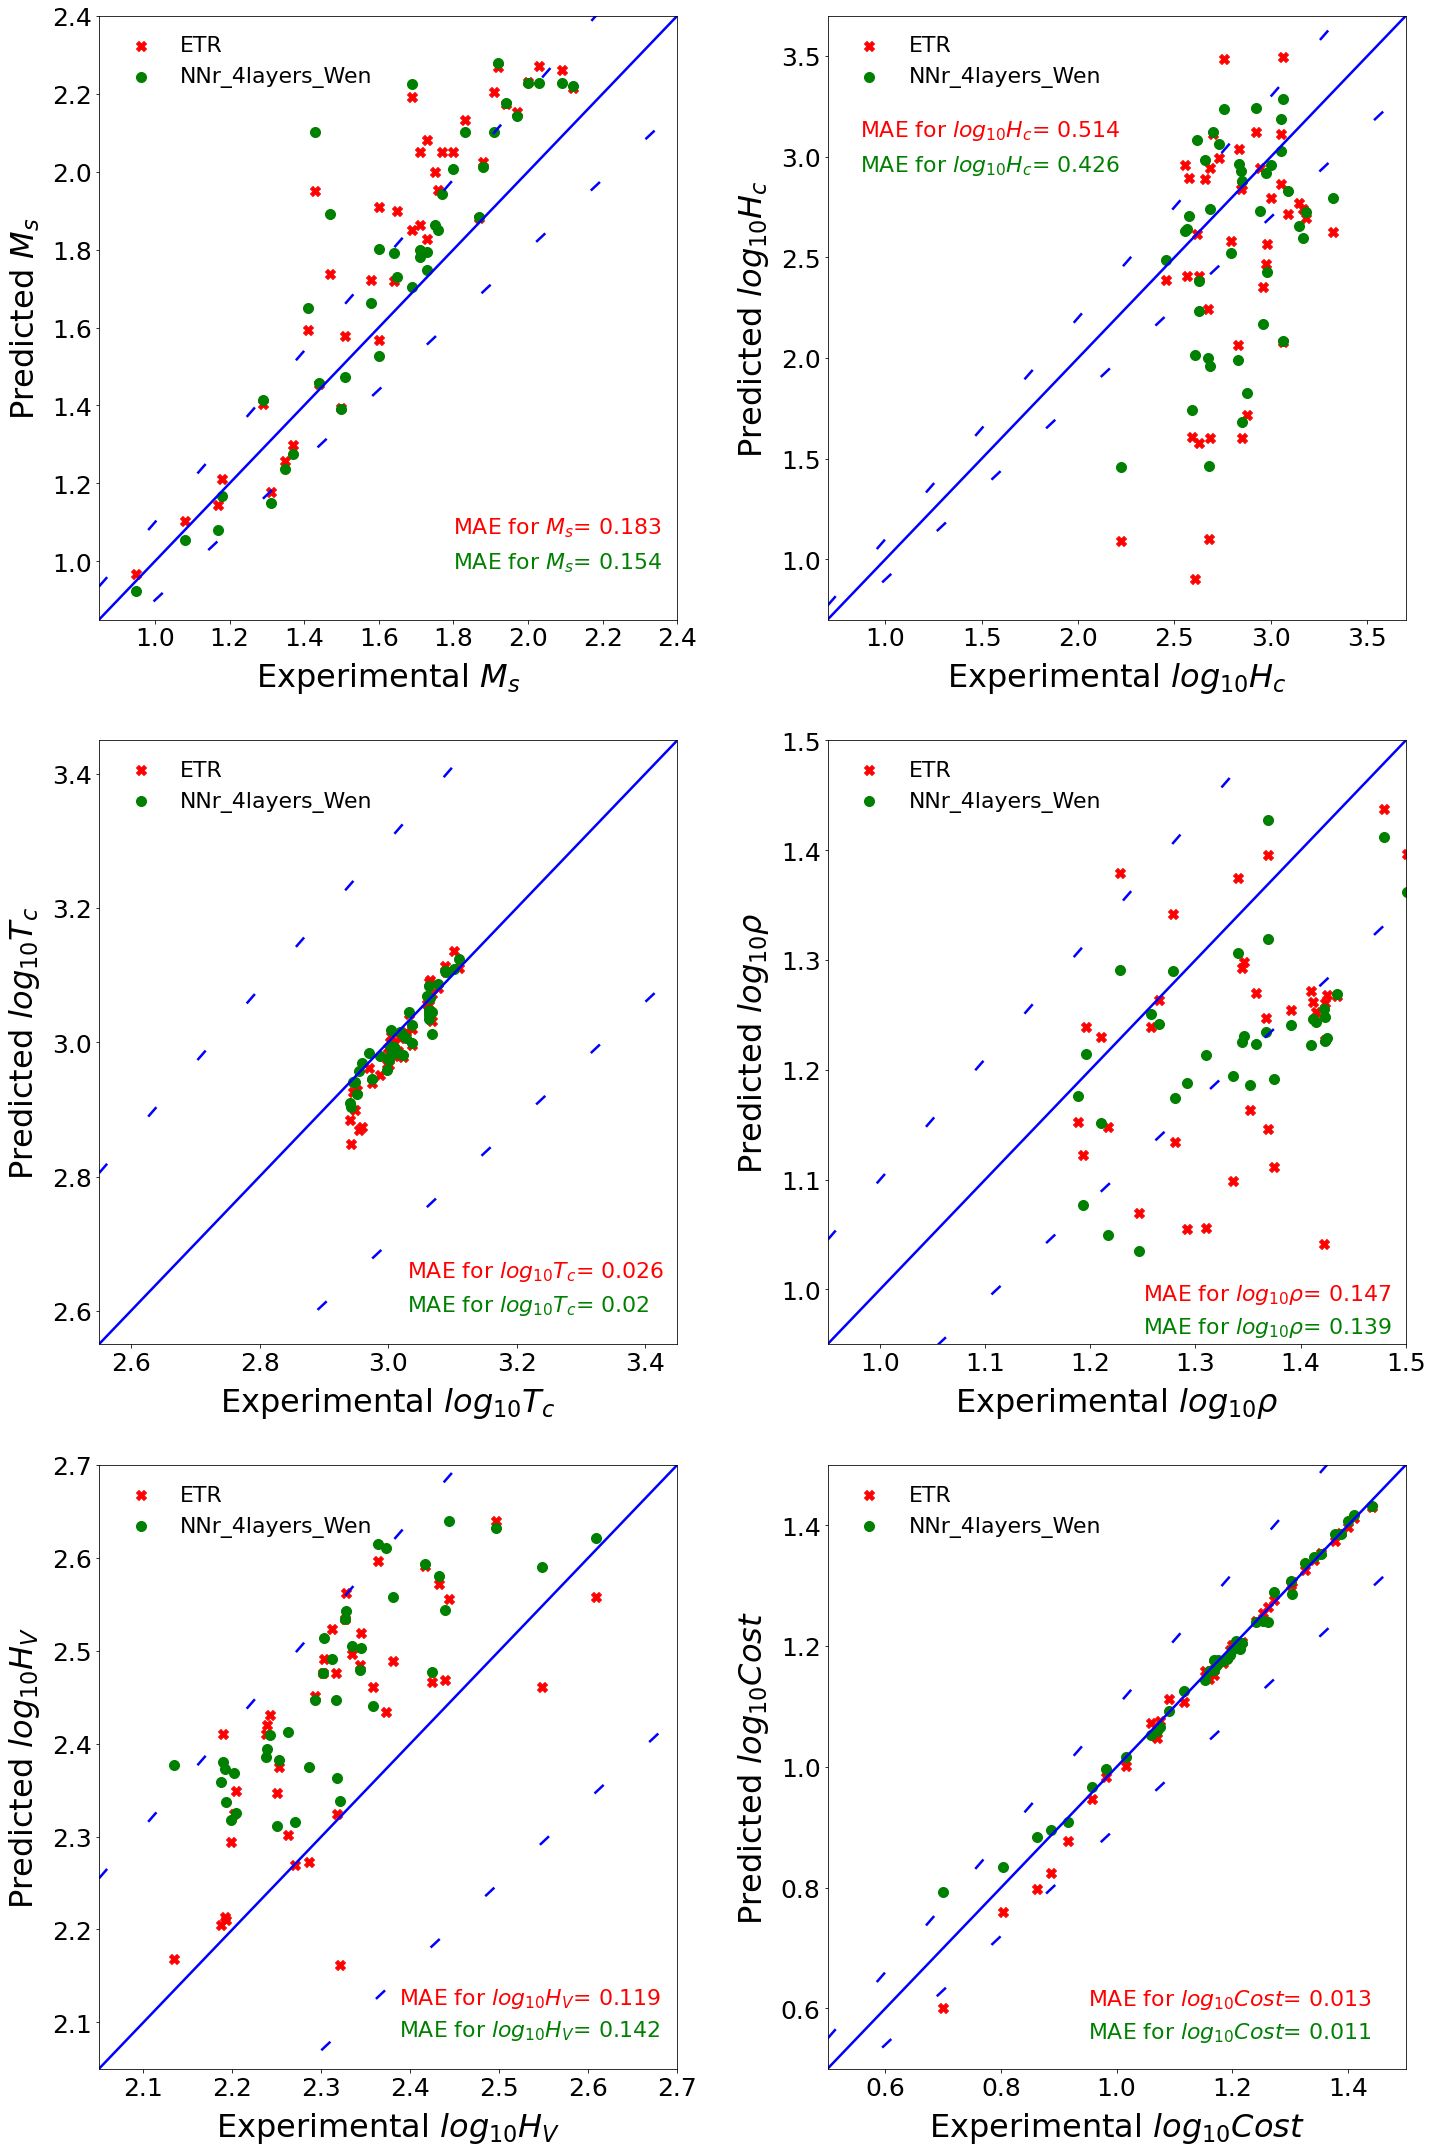

In [53]:
ax_limits = [[0.85,2.4],[0.7,3.7],[2.55,3.45],[0.95,1.5],[2.05,2.7],[0.5,1.5]]
etr_limits = [[1.8,1.07],[0.87,3.1],[3.03,2.65],[1.25,0.99],[2.387,2.12],[0.95,0.605]]
nn4_limits = [[1.8,0.98],[0.87,2.93],[3.03,2.6],[1.25,0.96],[2.387,2.085],[0.95,0.55]]

comparision1, ax = plt.subplots(3,2, figsize=(20, 30))
title = [r'$M_s$', r'$log_{10}H_c$', r'$log_{10}T_c$', r'$log_{10}\rho$', r'$log_{10}H_V$', r'$log_{10}Cost$']
countX = 0
countY = 0

for i in range(6):
    
    x = exp_data.iloc[:,3+i].to_numpy()
    if i < 4:
        y1 = etpredprop.iloc[:,i].to_numpy()
        y2 = nn4wenpredprop.iloc[:,i].to_numpy()
    else:
        y1 = etpredprop.iloc[:,i+1].to_numpy()
        y2 = nn4wenpredprop.iloc[:,i+1].to_numpy()
    
    x1 = [ax_limits[i][0] - 0.1*ax_limits[i][0],ax_limits[i][1] - 0.1*ax_limits[i][1]]
    x2 = [ax_limits[i][0] + 0.1*ax_limits[i][0],ax_limits[i][1] + 0.1*ax_limits[i][1]]
    
    ax[countX,countY].set_xlabel('Experimental '+title[i],fontsize=32, labelpad=10)
    ax[countX,countY].set_ylabel('Predicted '+title[i],fontsize=32, labelpad=10)
    ax[countX,countY].plot(ax_limits[i],ax_limits[i],linestyle='-',color='b',linewidth=2.5)
    ax[countX,countY].plot(ax_limits[i],x1,linestyle='-',dashes=(5,25),color='b',linewidth=2.5)
    ax[countX,countY].plot(ax_limits[i],x2,linestyle='-',dashes=(5,25),color='b',linewidth=2.5)
    ax[countX,countY].scatter(x,y1,s=100,color='r',marker='X',label='ETR')
    ax[countX,countY].scatter(x,y2,s=100,color='g',marker='o',label='NNr_4layers_Wen')
    ax[countX,countY].set_xlim(ax_limits[i])
    ax[countX,countY].set_ylim(ax_limits[i])
    ax[countX,countY].legend(loc='upper left',fontsize=22, frameon=False)
    ax[countX,countY].text(etr_limits[i][0],etr_limits[i][1],'MAE for '+title[i]+'= '+str(round(etr_mae[i],3)),color='r',fontsize=22)
    ax[countX,countY].text(nn4_limits[i][0],nn4_limits[i][1],'MAE for '+title[i]+'= '+str(round(nn4wen_mae[i],3)),color='g',fontsize=22)
    for label in (ax[countX,countY].get_xticklabels() + ax[countX,countY].get_yticklabels()):
        label.set_fontsize(25)
    countY +=1
    if countY == 2:
        countY = 0
        countX += 1

plt.tight_layout()
plt.subplots_adjust(wspace=0.26,hspace=0.20)
plt.show()

In [54]:
comparision1.savefig('Multi-property selected pred comparision.jpg', dpi=600)